In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Data link https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
data.shape

(284807, 31)

In [15]:
data["Class"].unique()

array([0, 1])

In [16]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# here the target value is Class, where 0 refers to non fraud and 1 refers to fraud
# creating train test split
from sklearn.model_selection import train_test_split
X = data.drop(["Time", "Class"], axis = 1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9991924440855307

## Evaluating Model

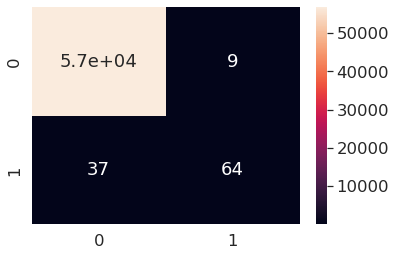

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
y_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True);

In [21]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
y_proba = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1])
def plot_roc_curve(fpr, tpr):
    '''
    A function to plot the roc curve when we pass the false positive rate(fpr) and true positive rate(tpr)
    '''
    plt.plot(fpr, tpr,color = 'orange', label = 'ROC curve')
    plt.plot([0,1],[0,1], linestyle = '--',color = 'darkblue', label = 'Guess line')
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic Curve (ROC)')
    plt.legend()
    plt.show()

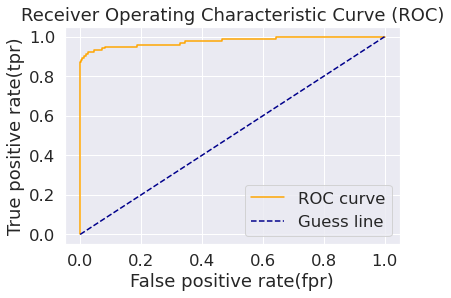

In [32]:
plot_roc_curve(fpr, tpr)

In [34]:
roc_auc_score(y_test, y_proba[:,1])

0.9777520690110902